In [2]:
import importlib
# If available, will apply style to the plots using jupyterthemes
is_jupthemes_available = importlib.util.find_spec("jupyterthemes") is not None
# Call this function after '%matplotlib inline'
def plot_styling():
    if importlib.util.find_spec("jupyterthemes") is not None:
        from jupyterthemes import jtplot
        jtplot.style(figsize=(15, 8))
 # Just to show if we actually imported the module
print(is_jupthemes_available)

True


### IsolationForest: Anomaly detection visualization

Generate sample distribution

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
%matplotlib inline
plot_styling()
X = np.concatenate((
    np.random.normal(5, 1, 100000),
    np.random.normal(15, 1, 100000),
    np.random.normal(25, 1, 100000)
    )).reshape(-1, 1)
print()
plt.hist(X, density=True)
plt.xlim([0, 30])
plt.show()

NameError: name 'plot_styling' is not defined

Plot Outlier using fill_between

In [4]:
X.shape

(300000, 1)

206 ms ± 42.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


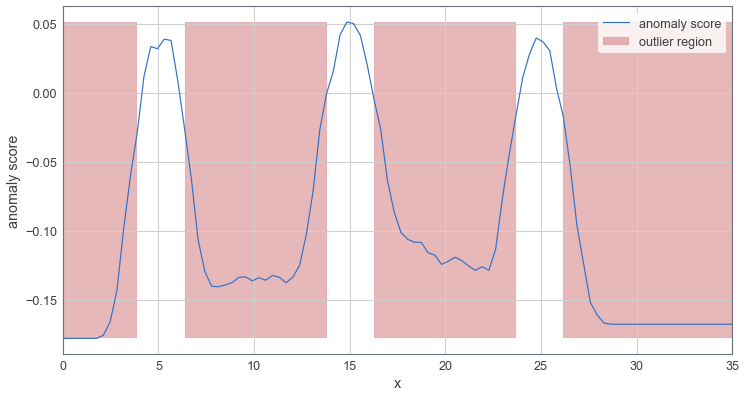

In [5]:
xx = np.linspace(0, 35, 100).reshape(-1,1)
# Train anomaly detection model
model = IsolationForest(random_state=1, n_jobs=-1, behaviour="new", contamination="auto")
%timeit model.fit(X)
anomaly_score = model.decision_function(xx)
outlier = model.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([0, 35])
plt.show()


### Seaborn legends

In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
plot_styling()
import pandas as pd
import numpy as np

NameError: name 'plot_styling' is not defined

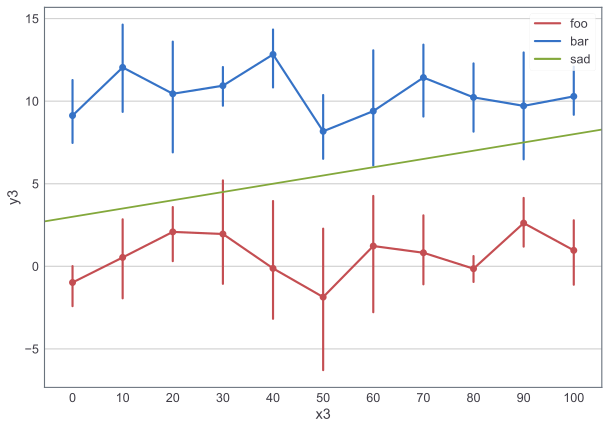

In [7]:
df1 = pd.DataFrame({
    "x1": np.repeat(np.arange(0, 101, 10), 5),
    "y1": np.random.normal(size=(55))*3 + 1
})


df2 = pd.DataFrame({
    "x2": np.repeat(np.arange(0, 101, 10), 5),
    "y2": np.random.normal(size=(55))*3 + 10
})

df3 = pd.DataFrame({
    "x3": np.arange(0, 10),
    "y3": 3 + np.arange(0, 10)*1/2
})

fig, ax = plt.subplots(figsize=(10, 7))
sns.pointplot(x="x1", y="y1", data=df1, marker="o", color="r", ax=ax)
sns.pointplot(x="x2", y="y2", data=df2, marker="o", color="b", ax=ax)
sns.regplot(x="x3", y="y3", data=df3, marker="", color="g", ax=ax)

# Add legends
ax.legend(labels=['foo', 'bar', 'sad'], loc=1)
leg = ax.get_legend()
leg.legendHandles[0].set_color('r')
leg.legendHandles[1].set_color('b')
leg.legendHandles[2].set_color('g')


###  A good definition of plots palette

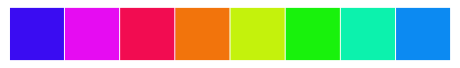

In [1]:
import toolz as fp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_rows', 50)
palette = sns.hls_palette(8, h=.7, s=.9, l=0.5)
sns.palplot(palette)
sns.set_palette(palette)

gray = "444444"

plt.rcParams['figure.facecolor'] = '1'  # background color
plt.rcParams['axes.facecolor'] = '1'  # plot background color

plt.rcParams['grid.color'] = '0.8'
plt.rcParams['grid.alpha'] = .4

plt.rcParams['axes.edgecolor'] = '1'

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.linestyle'] = '-'

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.labelcolor'] = gray

plt.rcParams['text.color'] = gray

plt.rcParams['xtick.color'] = gray
plt.rcParams['ytick.color'] = gray
sns.set_style("whitegrid")

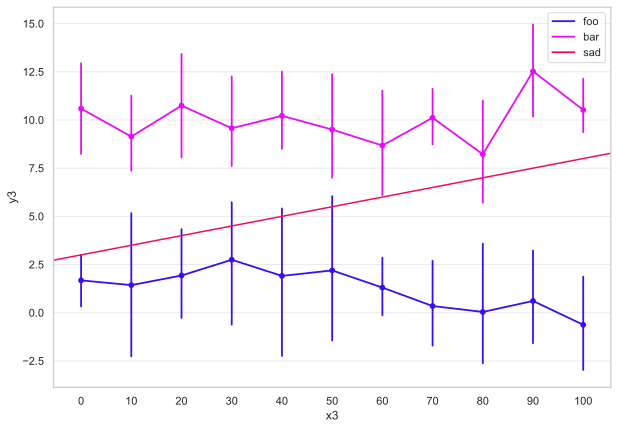

In [2]:
df1 = pd.DataFrame({
    "x1": np.repeat(np.arange(0, 101, 10), 5),
    "y1": np.random.normal(size=(55))*3 + 1
})


df2 = pd.DataFrame({
    "x2": np.repeat(np.arange(0, 101, 10), 5),
    "y2": np.random.normal(size=(55))*3 + 10
})

df3 = pd.DataFrame({
    "x3": np.arange(0, 10),
    "y3": 3 + np.arange(0, 10)*1/2
})

fig, ax = plt.subplots(figsize=(10, 7))
c_x1, c_x2, c_x3 = sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]
sns.pointplot(x="x1", y="y1", data=df1, marker="o", color=c_x1, ax=ax)
sns.pointplot(x="x2", y="y2", data=df2, marker="o", color=c_x2, ax=ax)
sns.regplot(x="x3", y="y3", data=df3, marker="", color=c_x3, ax=ax)

# Add legends
ax.legend(labels=['foo', 'bar', 'sad'], loc=1)
leg = ax.get_legend()
leg.legendHandles[0].set_color(c_x1)
leg.legendHandles[1].set_color(c_x2)
leg.legendHandles[2].set_color(c_x3)


### Updating xtick labels for multiples

In [3]:
def update_pointplot_xlabels(multiple_of=5, rotation=0, ax=None, xticks=True):
    """update the xlabels and xticks of the axis passed.
        with this function, it can plot xticks/labels with different periods, using the
        multiple_of parameter
    """
    if ax is None:
        ax = plt.gca()
    new_labels, new_xticks = [], []
    if xticks:
        for i, label in enumerate(ax.get_xticklabels()):
            if i % multiple_of == 0:
                new_labels.append(label)
        for i, tick in enumerate(ax.get_xticks()):
            if i % multiple_of == 0:
                new_xticks.append(tick)
        ax.set_xticks(new_xticks)
    else:
        for i, label in enumerate(ax.get_xticklabels()):
            new_labels.append(label if i % multiple_of == 0 else "")
    ax.set_xticklabels(new_labels, rotation=rotation)


Without function

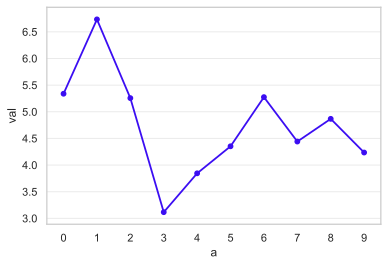

In [12]:
sns.pointplot(x="a", y="val", data=df.assign(val=lambda df: np.random.normal(5, scale=1, size=df.shape[0])))

Showing only multiples of 2

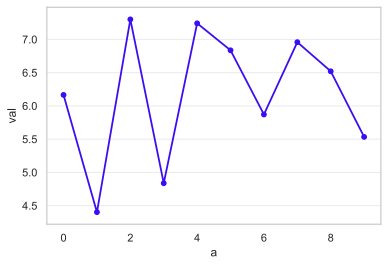

In [15]:
sns.pointplot(x="a", y="val", data=df.assign(val=lambda df: np.random.normal(5, scale=1, size=df.shape[0])))
update_pointplot_xlabels(multiple_of=2, ax=plt.gca())

### Creating a colorbar for common plots

Using legends

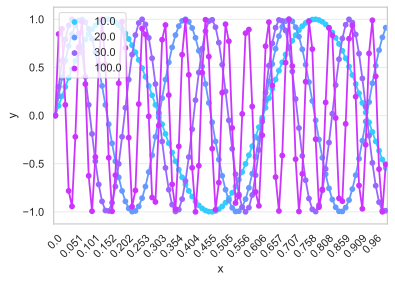

In [4]:
_x, _y, _z = np.array([]), np.array([]), np.array([])
for _z_t in [10, 20, 30, 100]:
    _x_t = np.linspace(0, 1, 100)
    _y_t = np.array(list(map(lambda e: np.sin(e * _z_t), _x_t)))
    _x = np.concatenate([_x, _x_t])
    _y = np.concatenate([_y, _y_t])
    _z = np.concatenate([_z, np.repeat([_z_t], len(_x_t))])
list(map(lambda e: e.shape, (_x, _y, _z)))
temp_df = pd.DataFrame(dict(x=np.round(_x, 3), y=_y, z=_z))
sns.pointplot(x="x", y="y", hue="z", data=temp_df, palette=sns.color_palette("cool", n_colors=len(np.unique(_z))))
update_pointplot_xlabels(rotation=45)
plt.legend(loc=2)

Using a colorbar

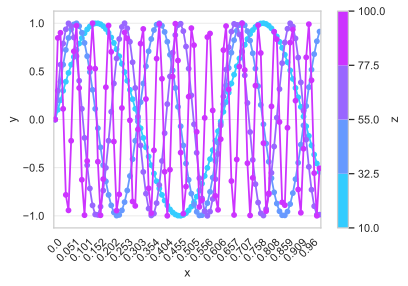

In [5]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap
sns.pointplot(x="x", y="y", hue="z", data=temp_df, palette=sns.color_palette("cool", n_colors=len(np.unique(_z))))
update_pointplot_xlabels(rotation=45)
plt.gca().get_legend().remove() # remove traditional legend
cmap = ListedColormap(sns.color_palette("cool", n_colors=len(np.unique(_z))))
norm = mpl.colors.Normalize(vmin=temp_df.z.min(), vmax=temp_df.z.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(temp_df.z.min(), temp_df.z.max(), 5), ax=plt.gca(), label="z")


## SANDBOX